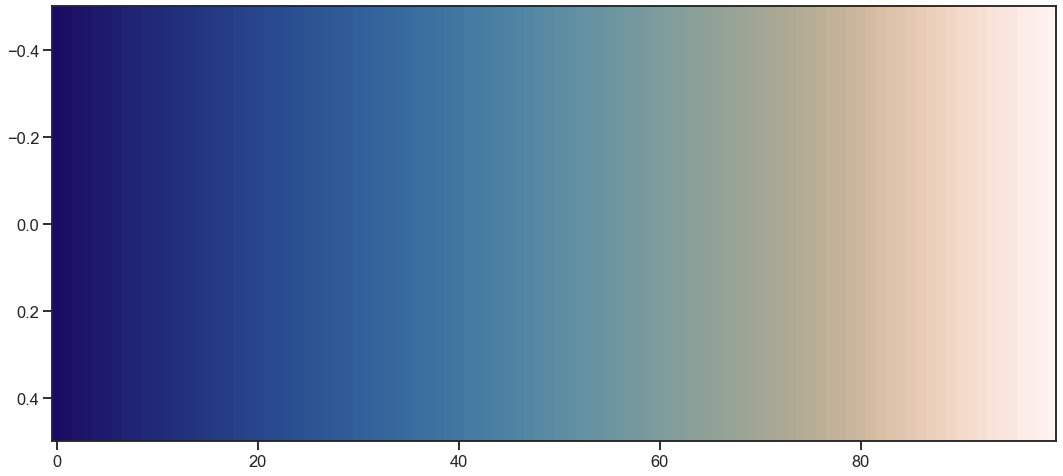

(0.147494, 0.228107, 0.516608, 1.0)

In [403]:
f, ax = plt.subplots(figsize=(18, 8))
x = np.linspace(0, 100, 100)[None, :]
ax.imshow(x, aspect='auto', cmap=cm.lapaz) # or any other colourmap
plt.show()
cm.lapaz(40)

# Conjunto de imagenes para articulo

Perez, A. & Dominguez, C. (2022). Outer tropical cyclone size database for precipitation in the North Atlantic and Northeast Pacific. Earth System Science Data

In [111]:
# Importar librerias
import pandas as pd
import netCDF4 as nc
import numpy as np
import cv2
import os
import errno
import geopandas as gpd
import seaborn as sns
import shapely
from shapely.geometry import shape, Polygon, Point, MultiPoint, box, LineString

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
import cartopy
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
def each6h(dfNA):
    df = dfNA.loc[(dfNA.hh == 0)|(dfNA.hh == 12)|(dfNA.hh == 18)|(dfNA.hh == 6)].reset_index(drop=True)
    return df

In [4]:
names = ['dd','mm','yy','hh','lat', 'lon', 'MWS', 'CPSL', 'RNE', 'RNO', 'RSO', 'RSE','Rp','A','D','S','CT']
dfNA = each6h(pd.read_table('800/NA880.dat', names=names, index_col=False))
dfEP = each6h(pd.read_table('800/EP880.dat', names=names, index_col=False))

### FIGURA 1. 
Extensión del campo de nubes a través de contornos generados con imágenes IR (contornos grises) del huracán Alex en el 2010, cuyas posiciones están representadas por puntos azules. Las líneas rojas representan la división de cuadrantes considerada para la determinación de los radios del CT.

In [338]:
from cmcrameri import cm
from cartopy.io.shapereader import Reader as sf
from cartopy.feature import ShapelyFeature as cfeature
import cartopy.io.img_tiles as cimgt

In [339]:
def circulo(c,r):
    """Función para construir un circulo. Los argumentos para la función son:
    C = centro de la circunferencia
    r = medida de la circunferencia 
    Ambas medidas deben estar en posición en grados"""
    ang = np.arange(0,np.pi*2,0.01)
    x = r*np.cos(ang)+c[0]
    y = r*np.sin(ang)+c[1]
    return (x,y)
def gdf_conver(gdf):
    """ Función para convertir una serie de datos al crs EPSG:4326, que
    representa una proyección geografica WGS84"""
    return gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[gdf])

In [340]:
poly = pd.read_csv('pol_alex.csv')
geometry = gpd.GeoSeries.from_wkt(poly['geometry'] )
poly = gpd.GeoDataFrame(data = poly, geometry = geometry, crs = 4326)
alex = dfNA.loc[(dfNA.CT== 'AL012010')]

In [356]:
i = 26
R34 = 232.5
R34_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],R34/111.1)
polyr34 =  gdf_conver(LineString(list(zip(R34_plot[0],R34_plot[1]))))

In [357]:
i = 26

ctp = [alex.iloc[i].lon,alex.iloc[i].lat]

ctpos = gdf_conver(Point([alex.iloc[i].lon,alex.iloc[i].lat]))
ctpos['Name'] = 'Centro del CT'
R_plot = circulo([alex.iloc[i].lon,alex.iloc[i].lat],alex.iloc[i].Rp/109)
polyar =  gdf_conver(LineString(list(zip(R_plot[0],R_plot[1]))))



#plt.savefig("images/Fig_2_3.jpeg", dpi= 300, bbox_inches='tight')

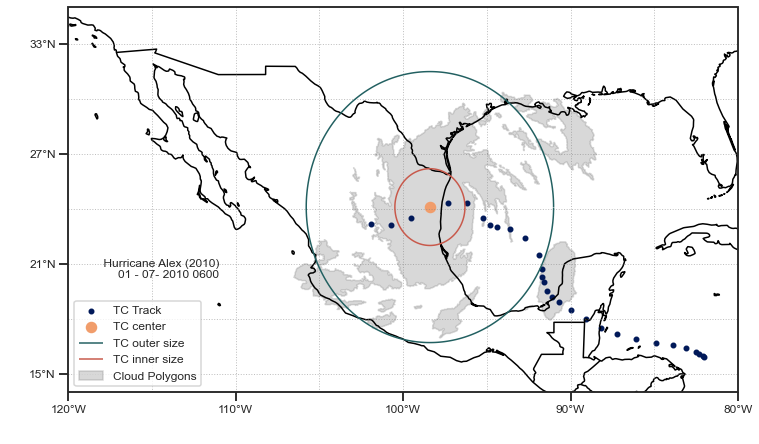

In [367]:
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection":ccrs.PlateCarree()})

# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-120, -80, 14, 35], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-120,-79,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(15,35,6), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
poly[poly['ID']==i].plot(
                         ax=ax, alpha = 0.3, color = 'gray', legend=True,
                         edgecolor= 'gray'
                        )
alex.plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax, 
          color = cm.batlowS(0), xlabel =' ', ylabel= ' ', label = 'TC Track'
          )
ctpos.plot(
            ax=ax, color = cm.batlowS(4), markersize = 100, legend=True, label = 'TC center'
           )
polyar.plot(
            ax=ax, color = cm.batlowS(3),label = 'TC outer size', legend=True, 
            linewidth = 1.5
            )
polyr34.plot(
             ax=ax, color = cm.lajollaS(66),label = 'TC inner size', legend=True, 
            linewidth = 1.5
            )

text = ' Hurricane Alex (2010)\n01 - 07- 2010 0600'
ax.text(-111, 20.7, text, fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(color='grey', alpha = 0.3, label='Cloud Polygons')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

plt.savefig("Fig_1.jpeg", dpi= 300, bbox_inches='tight')

### FIGURA 2. 
 Ejemplo de tamaños calculados para el Huracán Patricia por cuadrante resultado de la técnica: a) ROCLOUD y b) RPB. 

In [172]:
def eti_fecha(hh,dd,mm,yy):
    return str(hh).zfill(2)+':00 UTC \n'+str(dd).zfill(2)+'−'+ str(mm).zfill(2)+'−' +str(yy)
def arco(r1,r2,r3,r4,c):
    ang = [np.arange(0,np.pi/2,0.01), np.arange(np.pi/2,np.pi,0.01),
           np.arange(np.pi,(3/2)*np.pi,0.01),np.arange((3/2)*np.pi,2*np.pi,0.01)]
    grafx, grafy = [], []
    for i,r in enumerate([r1,r2,r3,r4]): 
        grafx.append(r*np.cos(ang[i])+c[0])
        grafy.append(r*np.sin(ang[i])+c[1])
    return (np.concatenate(grafx, axis = 0),np.concatenate(grafy, axis = 0))
def arc(lon,lat,r1,r2,r3,r4):
    ctpos = [lon,lat]
    r1 = r1/111.1
    r2 = r2/111.1
    r3 = r3/111.1
    r4 = r4/111.1
    arc = arco(r1,r2,r3,r4,ctpos)
    return Polygon(list(zip(arc[0],arc[1])))

In [63]:
alex = dfNA.loc[(dfNA.CT== 'AL012010')]
alex = alex.reset_index(drop = True)

In [71]:
polygons = gpd.GeoDataFrame()

In [74]:
polygons['geometry'] = alex[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)

#### Para la precipitación:

In [187]:
names = ['CT','dd','mm','yy','hh','lat', 'lon', 'MWS', 'RNE', 'RNO', 'RSO', 'RSE','Rp']
PCPNA = each6h(pd.read_table('NA_2.5mm.dat', names=names, index_col=False))

In [189]:
alexpcp = PCPNA.loc[(PCPNA.CT== 'AL012010')]
alexpcp = alexpcp.reset_index(drop = True)
polygonspcp = gpd.GeoDataFrame()
polygonspcp['geometry'] = alexpcp[['lon','lat','RNE','RNO','RSO','RSE']].apply(lambda x: arc(x[0],x[1],x[2],x[3],x[4],x[5]), axis = 1)


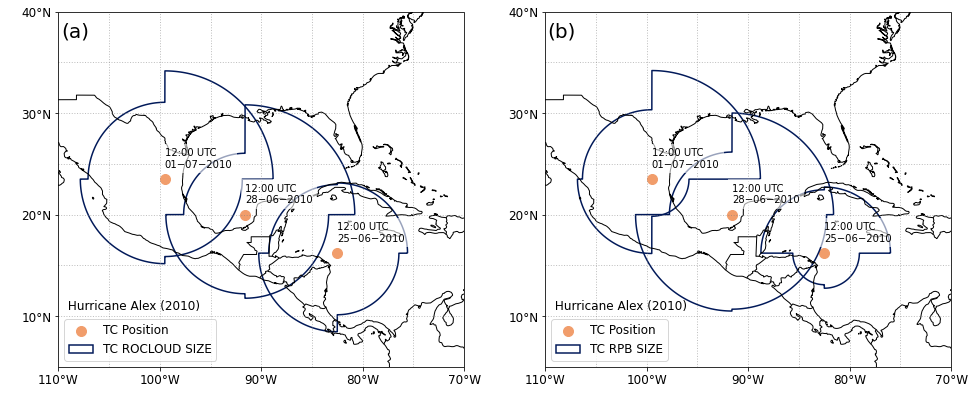

In [208]:
f, axs = plt.subplots(1,2,figsize=(16, 12), subplot_kw={"projection":ccrs.PlateCarree()})

position = [3,15,27]
#########################################################################################################################
ax =axs[0]
# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-110, -70, 5, 40], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-110,-69,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,41,10), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
alex.iloc[position].plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax,  s = 100,
          color = cm.batlowS(4), xlabel =' ', ylabel= ' ', label = 'TC Position'
          )
polygons.iloc[position].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

etiquetas = alex[['hh','dd','mm','yy']].apply(lambda x: eti_fecha(x[0],x[1],x[2],x[3]),axis=1)
for x, y, label in zip(alex.iloc[position].lon, alex.iloc[position].lat, etiquetas[position]):
    ax.annotate(label, xy=(x, y),xytext=(0, 12), textcoords="offset points", fontsize = 10,
                bbox=dict(facecolor='w', alpha = 0.6, edgecolor='None'))

ax.text(-96, 11, ' Hurricane Alex (2010)', fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

ax.text(-107, 38, '(a)', fontsize = 20, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(facecolor = 'w',linewidth = 1.5, edgecolor = cm.batlowS(0) , label = 'TC ROCLOUD SIZE')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

#######################################################################################################################
ax =axs[1]
# Configuracion de mapas precargados
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)

# Se define la extensión a mostrar en el mapa
ax.set_extent([-110, -70, 5, 40], ccrs.PlateCarree())

# Definición de marcas en el mapa
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
ax.set_xticks(np.arange(-110,-69,10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10,41,10), crs=ccrs.PlateCarree())
ax.tick_params(axis='both', labelsize=12)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Postura de elementos a mostrar en el mapa
alexpcp.iloc[position].plot(
          x = 'lon', y = 'lat', kind = 'scatter', ax=ax,  s = 100,
          color = cm.batlowS(4), xlabel =' ', ylabel= ' ', label = 'TC Position'
          )
polygonspcp.iloc[position].plot(ax=ax, color = "None", edgecolor= cm.batlowS(0), linewidth = 1.5)

etiquetas = alex[['hh','dd','mm','yy']].apply(lambda x: eti_fecha(x[0],x[1],x[2],x[3]),axis=1)
for x, y, label in zip(alex.iloc[position].lon, alex.iloc[position].lat, etiquetas[position]):
    ax.annotate(label, xy=(x, y),xytext=(0, 12), textcoords="offset points", fontsize = 10,
                bbox=dict(facecolor='w', alpha = 0.6, edgecolor='None'))

ax.text(-96, 11, ' Hurricane Alex (2010)', fontsize = 12, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

ax.text(-107, 38, '(b)', fontsize = 20, verticalalignment='center', horizontalalignment='right',
            transform=ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Patch(facecolor = "w",linewidth = 1.5, edgecolor = cm.batlowS(0) ,label = 'TC RPB SIZE')

handles.append(patch) 

ax.legend(handles=handles, loc=3, fontsize=12)

#######################################################################################################################

plt.savefig("Fig_2.jpeg", dpi= 300, bbox_inches='tight')

## FIGURA 3 
Gráfico de cajas y bigotes de las distribuciones de los radios por cuadrante y el Rmean (km) de los radios en la región de estudio de la cuenca NA (rojo) y  EP (gris). Los valores promedios se encuentran representados por el punto blanco dentro de la caja durante el periodo 2000-2020.


In [219]:
from itertools import combinations
from statannotations.Annotator import Annotator

In [413]:
def df_cuenca(cuenca,R1,R2,R3,R4,R5):
    df = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    df4 = pd.DataFrame()
    RADIOS =pd.DataFrame()
    df['tamaño'] = R1
    df['radio'] = 'RNE'
    df['cuenca'] = cuenca

    df1['tamaño'] = R2
    df1['radio'] = 'RNW'
    df1['cuenca'] = cuenca

    df2['tamaño'] = R3
    df2['radio'] = 'RSW'
    df2['cuenca'] = cuenca

    df3['tamaño'] = R4
    df3['radio'] = 'RSE'
    df3['cuenca'] = cuenca

    df4['tamaño'] = R5
    df4['radio'] = 'Rmean'
    df4['cuenca'] = cuenca

    RADIOS = pd.concat([RADIOS,df,df1,df2,df3,df4], axis=0)
    return RADIOS


In [414]:
RADIOS = pd.concat([df_cuenca('NA',dfNA.RNE,dfNA.RNO,dfNA.RSO,dfNA.RSE,dfNA.Rp), 
                    df_cuenca('EP',dfEP.RNE,dfEP.RNO,dfEP.RSO,dfEP.RSE,dfEP.Rp)],
                   axis= 0)


In [417]:
pairs = [
         [('RNE', 'NA'), ('RNE', 'EP')], 
         [('RNW', 'NA'), ('RNW', 'EP')],
         [('RSW', 'NA'), ('RSW', 'EP')], 
         [('RSE', 'NA'), ('RSE', 'EP')],    
         [('Rmean', 'NA'),('Rmean', 'EP')]
]

RNW_NA vs. RNW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.128e-18 U_stat=1.719e+07
RNE_NA vs. RNE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.856e-95 U_stat=1.924e+07
RSW_NA vs. RSW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.593e-01 U_stat=1.579e+07
RSE_NA vs. RSE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.939e-37 U_stat=1.786e+07
Rmean_NA vs. Rmean_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.692e-50 U_stat=1.825e+07


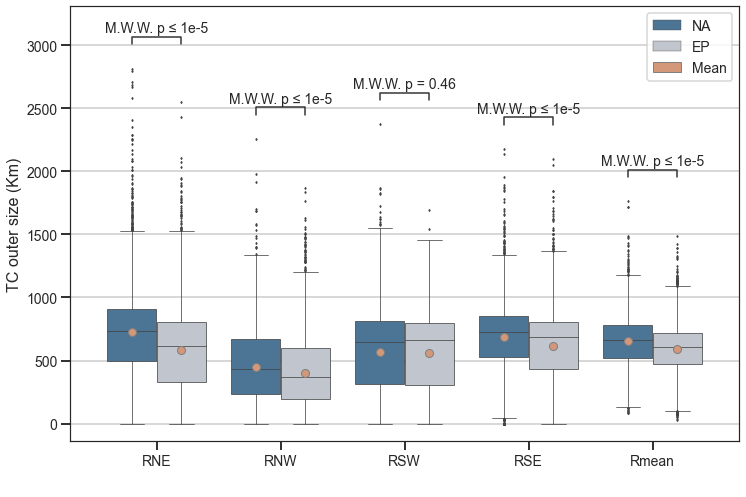

In [448]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
hue_plot_params = {
    'data': RADIOS,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]
}

f, ax = plt.subplots(figsize=(12, 8))
bp = sns.boxplot( ax = ax,
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"8"}
                )

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 14)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('TC outer size (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_box_aspect(0.5)

plt.setp(f.axes, yticks=np.arange(0,3001, 500))

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Circle((1,1),radius = 0.25, facecolor = cm.budaS(100), 
                        linewidth = 1, edgecolor = "gray", label ='Mean')

handles.append(patch) 

ax.legend(handles=handles, loc= "best", fontsize=14)


plt.savefig("Fig_3.jpeg", dpi= 300, bbox_inches='tight')

## Figura 4. 
Distribución espacial del tamaño de los CTs por cuadrante (km): (a) RNE, (b) RNO, (c) RSO, (d) RSE y (e) Rmean. Los límites en la barra de colores representan los rangos intercuantilícos (p25 y p75) durante el periodo 2000-2020.

In [488]:
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [472]:
dfbasin = pd.concat([dfNA,dfEP],axis=1)

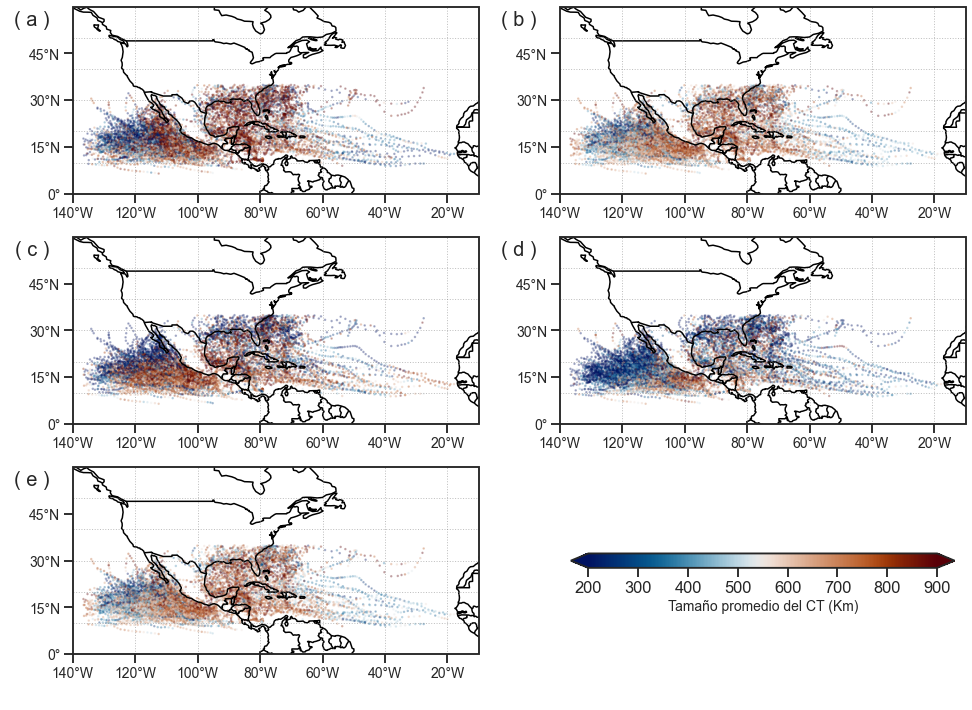

In [498]:
f, ax = plt.subplots(3, 2, figsize=(16, 12), subplot_kw={"projection":ccrs.PlateCarree()})

radi = ['RNE','RNO','RSO','RSE','Rp']

# ETIQUETA
for i,let in enumerate(['( a )','( c )','( e )']):
    ax[i,0].text(-0.1, 0.93, let, ha='center', va='center', 
                 transform=ax[i,0].transAxes, 
                 fontsize = 20, 
                 verticalalignment='center', horizontalalignment='right')
    ax[i,0].add_feature(cartopy.feature.COASTLINE)
    ax[i,0].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 60]
    ax[i,0].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,0].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,0].set_yticks(np.arange(0,60,15), crs=ccrs.PlateCarree())
    ax[i,0].tick_params(axis='both', labelsize=14)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,0].xaxis.set_major_formatter(lon_formatter)
    ax[i,0].yaxis.set_major_formatter(lat_formatter)
    dfbasin.plot(x='lon', y='lat', c = radi[(i*2)] , kind='scatter', alpha= 0.3,
             colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 200, s = 1,
            vmax = 900, legend = False, ax = ax[i,0], colorbar = False)

    
for i,let in enumerate(['( b )','( d )']):
    ax[i,1].text(-0.1, 0.93,let, ha='center', va='center', 
                 transform=ax[i,1].transAxes, 
                 fontsize = 20,
                 verticalalignment='center', horizontalalignment='right')
    ax[i,1].add_feature(cartopy.feature.COASTLINE)
    ax[i,1].add_feature(cartopy.feature.BORDERS)
    extent = [-140, -10, 0, 60]
    ax[i,1].set_extent(extent, ccrs.PlateCarree())

    gl = ax[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
    
    ax[i,1].set_xticks(np.arange(-140,-9,20), crs=ccrs.PlateCarree())
    ax[i,1].set_yticks(np.arange(0,60,15), crs=ccrs.PlateCarree())
    ax[i,1].tick_params(axis='both', labelsize=14)
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i,1].xaxis.set_major_formatter(lon_formatter)
    ax[i,1].yaxis.set_major_formatter(lat_formatter)
    dfbasin.plot(x='lon', y='lat', c = radi[(i*2)-1] , kind='scatter', alpha= 0.3,
         colormap = cm.vik , xlabel =' ', ylabel= ' ', vmin = 200, s = 1,
        vmax = 900, legend = False, ax = ax[i,1], colorbar = False)


ax[2,1].axis('off')

norm = plt.Normalize(200, 900)
sm = plt.cm.ScalarMappable(cmap=cm.vik , norm=norm)
sm.set_array([])    
    
plt.setp(f.axes, ylabel = ' ', xlabel = ' ')

axins1 = inset_axes(ax[2,1],
                    width="200%",  # width = 5% of parent_bbox width
                    height="15%",  # height : 50%
                    loc='center',
                    bbox_to_anchor=(0.25, 0.25, 0.5, 0.5),
                    bbox_transform=ax[2,1].transAxes,
                    borderpad=0)

cbar1 = f.colorbar(sm,cax=axins1, extend='both', orientation='horizontal')
axins1.xaxis.set_ticks_position("bottom")
cbar1.set_alpha(0.6)
cbar1.set_label('Tamaño promedio del CT (Km)',fontsize = 14)

plt.savefig("Fig_4.jpeg", dpi= 300, bbox_inches='tight')

## Figura 5
Gráfica de cajas y bigotes de los radios por cuadrante y radio promedio (km) definido por el algoritmo RPB de los CTs del NA (en rojo) y EP (en gris). El promedio se encuentra representado por el punto blanco durante el periodo 2000-2020.

In [501]:
names = ['CT','dd','mm','yy','hh','lat', 'lon', 'MWS', 'RNE', 'RNO', 'RSO', 'RSE','Rp']
PCPNA = each6h(pd.read_table('NA_2.5mm.dat', names=names, index_col=False))
PCPEP = each6h(pd.read_table('EP2_5mm.dat', names=names, index_col=False))

In [502]:
RADIOS_PCP = pd.concat([df_cuenca('NA',PCPNA.RNE,PCPNA.RNO,PCPNA.RSO,PCPNA.RSE,PCPNA.Rp), 
                    df_cuenca('EP',PCPEP.RNE,PCPEP.RNO,PCPEP.RSO,PCPEP.RSE,PCPEP.Rp)],
                   axis= 0)


In [503]:
pairs = [
         [('RNE', 'NA'), ('RNE', 'EP')], 
         [('RNW', 'NA'), ('RNW', 'EP')],
         [('RSW', 'NA'), ('RSW', 'EP')], 
         [('RSE', 'NA'), ('RSE', 'EP')],    
         [('Rmean', 'NA'),('Rmean', 'EP')]
]

RNW_NA vs. RNW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.128e-18 U_stat=1.719e+07
RNE_NA vs. RNE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.856e-95 U_stat=1.924e+07
RSW_NA vs. RSW_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.593e-01 U_stat=1.579e+07
RSE_NA vs. RSE_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.939e-37 U_stat=1.786e+07
Rmean_NA vs. Rmean_EP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.692e-50 U_stat=1.825e+07


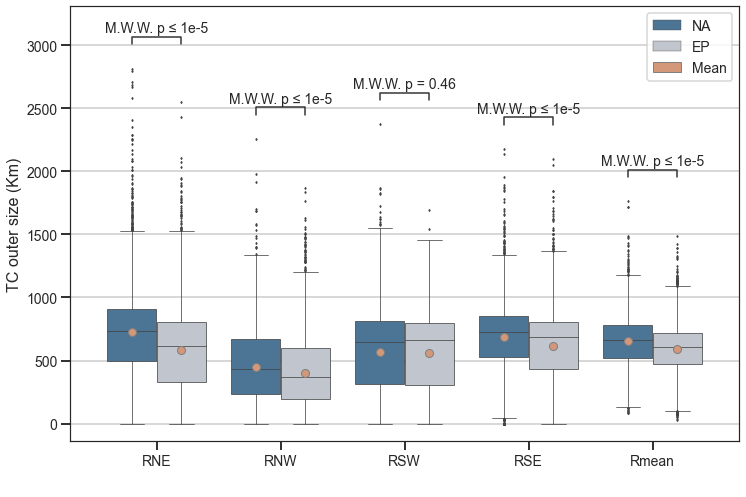

In [504]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
sns.set_style("ticks")
hue_plot_params = {
    'data': RADIOS,
    'x': 'radio',
    'y': 'tamaño',
    "order": RADIOS.radio.unique(),
    "hue": "cuenca",
    "hue_order": RADIOS.cuenca.unique(),
    "palette": [cm.lapaz(100), cm.osloS(29)]
}

f, ax = plt.subplots(figsize=(12, 8))
bp = sns.boxplot( ax = ax,
                 **hue_plot_params,
                 linewidth= 0.75,
                 fliersize = 1.5,
                 showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":cm.budaS(100), 
                            "markeredgecolor":"gray",
                            "markersize":"8"}
                )

annotator = Annotator(bp,pairs, **hue_plot_params)
annotator.configure(test= 'Mann-Whitney', text_format ='simple', fontsize = 14)
annotator.apply_and_annotate()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)

ax.yaxis.grid(True)
ax.set_ylabel('TC outer size (Km)', fontsize=16)
ax.set_xlabel(' ') 
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_box_aspect(0.5)

plt.setp(f.axes, yticks=np.arange(0,3001, 500))

handles, labels = ax.get_legend_handles_labels()

patch = mpatches.Circle((1,1),radius = 0.25, facecolor = cm.budaS(100), 
                        linewidth = 1, edgecolor = "gray", label ='Mean')

handles.append(patch) 

ax.legend(handles=handles, loc= "best", fontsize=14)


plt.savefig("Fig_5.jpeg", dpi= 300, bbox_inches='tight')